## Setup

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt 

#import tick formater
import matplotlib.ticker as mtick

#allow matplotlib to show charts in Jupyter Notebook
%matplotlib inline

In [2]:
#upload datasets
customer_data = pd.read_csv('/Users/joaosantos/Downloads/Business Analyst Case/customer_data.csv')
performance_data = pd.read_csv('/Users/joaosantos/Downloads/Business Analyst Case/performance_data.csv')
traffic_data = pd.read_csv('/Users/joaosantos/Downloads/Business Analyst Case/traffic_data.csv')

## Data Exploration

In [3]:
customer_data.head()

,import_timestamp,job_id,customer_id,rpc
0,2018-10-11 17:21:46 UTC,39fa99f14e41e57a73dae19aa17692c9,58,0.13
1,2018-10-12 02:55:13 UTC,212d51df7a937fa10049760942f1eb1e,58,0.13
2,2018-10-25 14:25:22 UTC,d1f21caad522973358103b2e81acf3db,58,0.13
3,2018-10-15 23:55:03 UTC,94d6416d1aaaf96ab4a9f7bb311d2a33,58,0.13
4,2018-10-11 08:00:43 UTC,f8a153d25b73e58b24e86f26a301aca2,58,0.13


In [4]:
traffic_data.head()

,channel,channel_type,marketing_partner_id,cpc
0,Email,unpaid,3,0.00
1,Search,paid,44,0.30
2,Search,paid,1,0.60
3,Search,paid,2,0.55
4,Display,paid,73,0.51


In [5]:
performance_data.head()

,date,user_id,session_id,job_id,marketing_partner_id,click_id
0,2018-10-01,db0f9785-b920-4672-b3b0-c3337a8037eb,0b3a8aab-bdf4-4c04-9002-97e343573cde,2b8d2867e0186cc7106cadd334cfb41f,1,4dQGKp/oPqCkSNP0CicqjT+8p8Zav/vct11ieOP2GMY=
1,2018-10-01,b5dc87a7-b39e-4d08-b096-a133838511d3,cd2a21ae-7908-45f0-a2e9-ca6e3ebd283e,4c3e6804e78315b6e182d478317d88b4,1,o2KYtsvq+z0Py41KV/xyoYjucGBwMGdMIrzF37N2U1o=
2,2018-10-01,1ed75464-e6e2-4e94-b6bd-3a108dafc7a2,1da77d76-db18-459b-9151-40469329b429,3af5abce5fa1fec887539e1ddf55faa1,1,HfVR9FnUhkpqCGJtEcY+ZyLr5C7B2M/eW+Fj1qli330=
3,2018-10-01,419fc473-0bf5-4a12-96ea-101ed38adec6,0adb23fe-0c63-40e9-a3c8-3da7e0ebdfcb,0fca4d38b37ebe2d54f7b490cd60fba5,1,j1Es1RRQy3bVQKXPnYHPRG2doZn7MS9ADfXrRMXnIEM=
4,2018-10-01,ec1a24b4-07e4-4267-a92d-96370b869be1,c9861e5c-0af4-44f0-b76e-5532a329e6ff,ade092c4539f568e6b26022f90893b54,1,INuQeCkbxL36v7N54Sax+b+Lr5V8oBo7ATOzHiym5UI=


In [6]:
cost_data = performance_data.merge(on='marketing_partner_id', how='left', right=traffic_data)

In [7]:
cost_data.head()

,date,user_id,session_id,job_id,marketing_partner_id,click_id,channel,channel_type,cpc
0,2018-10-01,db0f9785-b920-4672-b3b0-c3337a8037eb,0b3a8aab-bdf4-4c04-9002-97e343573cde,2b8d2867e0186cc7106cadd334cfb41f,1,4dQGKp/oPqCkSNP0CicqjT+8p8Zav/vct11ieOP2GMY=,Search,paid,0.6
1,2018-10-01,b5dc87a7-b39e-4d08-b096-a133838511d3,cd2a21ae-7908-45f0-a2e9-ca6e3ebd283e,4c3e6804e78315b6e182d478317d88b4,1,o2KYtsvq+z0Py41KV/xyoYjucGBwMGdMIrzF37N2U1o=,Search,paid,0.6
2,2018-10-01,1ed75464-e6e2-4e94-b6bd-3a108dafc7a2,1da77d76-db18-459b-9151-40469329b429,3af5abce5fa1fec887539e1ddf55faa1,1,HfVR9FnUhkpqCGJtEcY+ZyLr5C7B2M/eW+Fj1qli330=,Search,paid,0.6
3,2018-10-01,419fc473-0bf5-4a12-96ea-101ed38adec6,0adb23fe-0c63-40e9-a3c8-3da7e0ebdfcb,0fca4d38b37ebe2d54f7b490cd60fba5,1,j1Es1RRQy3bVQKXPnYHPRG2doZn7MS9ADfXrRMXnIEM=,Search,paid,0.6
4,2018-10-01,ec1a24b4-07e4-4267-a92d-96370b869be1,c9861e5c-0af4-44f0-b76e-5532a329e6ff,ade092c4539f568e6b26022f90893b54,1,INuQeCkbxL36v7N54Sax+b+Lr5V8oBo7ATOzHiym5UI=,Search,paid,0.6


In [8]:
revenue_data = performance_data.merge(on='job_id',how='left',right=customer_data).drop_duplicates()

In [9]:
revenue_data.head()

,date,user_id,session_id,job_id,marketing_partner_id,click_id,import_timestamp,customer_id,rpc
0,2018-10-01,db0f9785-b920-4672-b3b0-c3337a8037eb,0b3a8aab-bdf4-4c04-9002-97e343573cde,2b8d2867e0186cc7106cadd334cfb41f,1,4dQGKp/oPqCkSNP0CicqjT+8p8Zav/vct11ieOP2GMY=,2018-10-17 14:56:31 UTC,125,0.55
1,2018-10-01,b5dc87a7-b39e-4d08-b096-a133838511d3,cd2a21ae-7908-45f0-a2e9-ca6e3ebd283e,4c3e6804e78315b6e182d478317d88b4,1,o2KYtsvq+z0Py41KV/xyoYjucGBwMGdMIrzF37N2U1o=,2018-09-30 22:24:17 UTC,48,0.45
2,2018-10-01,1ed75464-e6e2-4e94-b6bd-3a108dafc7a2,1da77d76-db18-459b-9151-40469329b429,3af5abce5fa1fec887539e1ddf55faa1,1,HfVR9FnUhkpqCGJtEcY+ZyLr5C7B2M/eW+Fj1qli330=,2018-09-30 22:26:42 UTC,125,0.54
3,2018-10-01,419fc473-0bf5-4a12-96ea-101ed38adec6,0adb23fe-0c63-40e9-a3c8-3da7e0ebdfcb,0fca4d38b37ebe2d54f7b490cd60fba5,1,j1Es1RRQy3bVQKXPnYHPRG2doZn7MS9ADfXrRMXnIEM=,2018-10-01 20:33:28 UTC,125,0.55
4,2018-10-01,ec1a24b4-07e4-4267-a92d-96370b869be1,c9861e5c-0af4-44f0-b76e-5532a329e6ff,ade092c4539f568e6b26022f90893b54,1,INuQeCkbxL36v7N54Sax+b+Lr5V8oBo7ATOzHiym5UI=,2018-10-01 14:45:21 UTC,126,0.23


In [10]:
all_data = cost_data.merge(on='job_id',how='left',right=customer_data)

In [11]:
all_data.head()

,date,user_id,session_id,job_id,marketing_partner_id,click_id,channel,channel_type,cpc,import_timestamp,customer_id,rpc
0,2018-10-01,db0f9785-b920-4672-b3b0-c3337a8037eb,0b3a8aab-bdf4-4c04-9002-97e343573cde,2b8d2867e0186cc7106cadd334cfb41f,1,4dQGKp/oPqCkSNP0CicqjT+8p8Zav/vct11ieOP2GMY=,Search,paid,0.6,2018-10-17 14:56:31 UTC,125,0.55
1,2018-10-01,b5dc87a7-b39e-4d08-b096-a133838511d3,cd2a21ae-7908-45f0-a2e9-ca6e3ebd283e,4c3e6804e78315b6e182d478317d88b4,1,o2KYtsvq+z0Py41KV/xyoYjucGBwMGdMIrzF37N2U1o=,Search,paid,0.6,2018-09-30 22:24:17 UTC,48,0.45
2,2018-10-01,1ed75464-e6e2-4e94-b6bd-3a108dafc7a2,1da77d76-db18-459b-9151-40469329b429,3af5abce5fa1fec887539e1ddf55faa1,1,HfVR9FnUhkpqCGJtEcY+ZyLr5C7B2M/eW+Fj1qli330=,Search,paid,0.6,2018-09-30 22:26:42 UTC,125,0.54
3,2018-10-01,419fc473-0bf5-4a12-96ea-101ed38adec6,0adb23fe-0c63-40e9-a3c8-3da7e0ebdfcb,0fca4d38b37ebe2d54f7b490cd60fba5,1,j1Es1RRQy3bVQKXPnYHPRG2doZn7MS9ADfXrRMXnIEM=,Search,paid,0.6,2018-10-01 20:33:28 UTC,125,0.55
4,2018-10-01,ec1a24b4-07e4-4267-a92d-96370b869be1,c9861e5c-0af4-44f0-b76e-5532a329e6ff,ade092c4539f568e6b26022f90893b54,1,INuQeCkbxL36v7N54Sax+b+Lr5V8oBo7ATOzHiym5UI=,Search,paid,0.6,2018-10-01 14:45:21 UTC,126,0.23


In [12]:
#checking for null entries
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187923 entries, 0 to 187922
Data columns (total 12 columns):
date                    187923 non-null object
user_id                 187923 non-null object
session_id              187923 non-null object
job_id                  187923 non-null object
marketing_partner_id    187923 non-null int64
click_id                187923 non-null object
channel                 187923 non-null object
channel_type            187923 non-null object
cpc                     187923 non-null float64
import_timestamp        187923 non-null object
customer_id             187923 non-null int64
rpc                     187923 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 18.6+ MB


In [13]:
#droping duplicate entries
all_data.drop_duplicates(inplace=True)

In [14]:
#checking if removal of duplicates is in effect
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187161 entries, 0 to 187922
Data columns (total 12 columns):
date                    187161 non-null object
user_id                 187161 non-null object
session_id              187161 non-null object
job_id                  187161 non-null object
marketing_partner_id    187161 non-null int64
click_id                187161 non-null object
channel                 187161 non-null object
channel_type            187161 non-null object
cpc                     187161 non-null float64
import_timestamp        187161 non-null object
customer_id             187161 non-null int64
rpc                     187161 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 18.6+ MB


# Profitability Analysis

In [15]:
#group the data by Marketing ID and get the volume and profit measures
marketing_group = all_data.drop(axis=1,columns='customer_id').groupby(['marketing_partner_id'])
profit_analysis = pd.DataFrame(marketing_group['click_id'].nunique())
profit_analysis = profit_analysis.join(marketing_group.sum())
profit_analysis['profit'] = profit_analysis['rpc'] - profit_analysis['cpc']
profit_analysis['pct_cost'] = profit_analysis['cpc'].apply(lambda x: x/profit_analysis['cpc'].sum())
profit_analysis['pct_revenue'] = profit_analysis['rpc'].apply(lambda x: x/profit_analysis['rpc'].sum())
profit_analysis['pct_volume'] = profit_analysis['click_id'].apply(lambda x: x/profit_analysis['click_id'].sum())
profit_analysis.rename(columns={'click_id':'clicks volume'},inplace=True)
profit_analysis.reset_index(inplace=True)

In [16]:
profit_analysis.head()

,marketing_partner_id,clicks volume,cpc,rpc,profit,pct_cost,pct_revenue,pct_volume
0,1,31250,19365.60,14565.28,-4800.32,0.232926,0.172047,0.173057
1,2,12392,7173.10,5839.93,-1333.17,0.086277,0.068982,0.068625
2,3,14164,0.00,6708.14,6708.14,0.000000,0.079238,0.078438
3,5,2693,916.74,1132.95,216.21,0.011026,0.013383,0.014913
4,7,106,47.88,50.14,2.26,0.000576,0.000592,0.000587


In [17]:
#overall sum profit
print(f"€{profit_analysis['profit'].sum():,.0f}")


€1,518


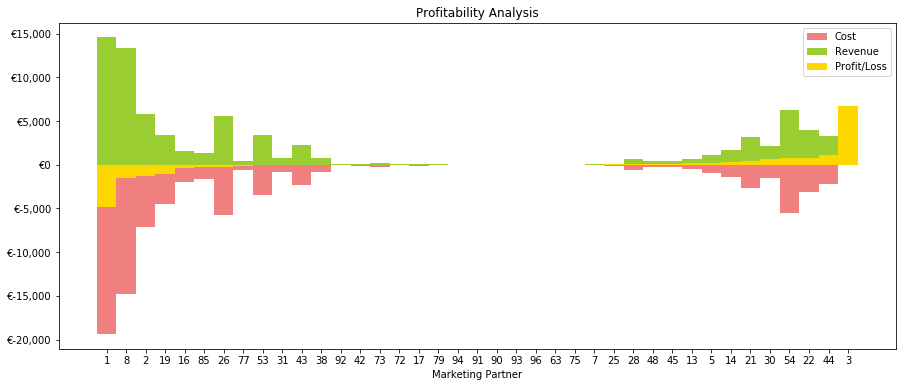

In [44]:
#display visually cost/revenue/profit measures per Marketing Partner
fig = plt.figure(figsize=(15,6))
ax = plt.subplot(111)
ax.bar(profit_analysis.sort_values('profit')['marketing_partner_id'].astype(str), profit_analysis.sort_values('profit')['cpc']*-1, width=1, color='lightcoral', label='Cost')
ax.bar(profit_analysis.sort_values('profit')['marketing_partner_id'].astype(str), profit_analysis.sort_values('profit')['rpc'], width=1, color='yellowgreen', label='Revenue')
ax.bar(profit_analysis.sort_values('profit')['marketing_partner_id'].astype(str), profit_analysis.sort_values('profit')['profit'], width=1, color='gold', label='Profit/Loss')
ax.legend()
ax.set_title('Profitability Analysis')
ax.set_xlabel('Marketing Partner')

#format yaxis ticks with € and 0 decimals
tick = mtick.StrMethodFormatter('€{x:,.0f}')
ax.yaxis.set_major_formatter(tick)

## Cost Analysis

In [19]:
#get costs distribution
cost_dist = cost_data.groupby('cpc')['click_id'].nunique()
cost_dist = pd.DataFrame(cost_dist).reset_index()
cost_dist['cost_sum'] = cost_dist['cpc']*cost_dist['click_id']

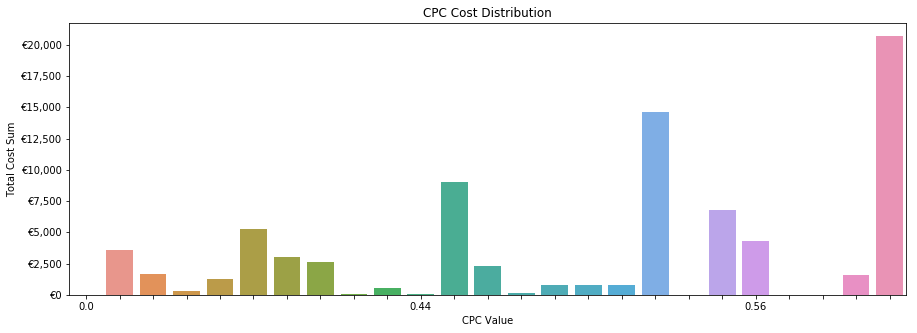

In [22]:
#plot total cost per cpc category value
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cost_dist['cpc'],y=cost_dist['cost_sum'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='CPC Value',ylabel='Total Cost Sum', title='CPC Cost Distribution')
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

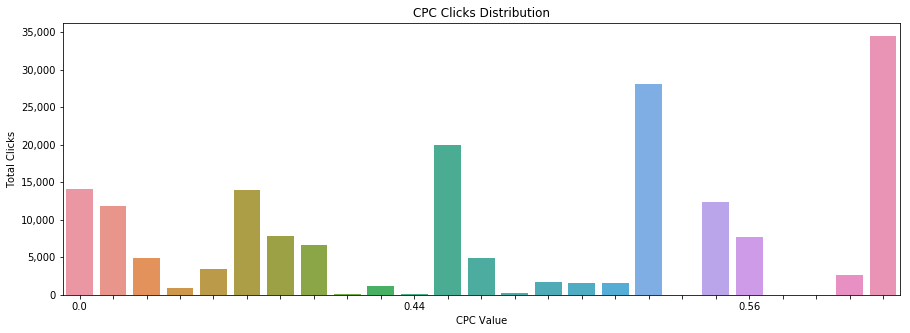

In [23]:
#plot total number of clicks per cpc category value
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cost_dist['cpc'],y=cost_dist['click_id'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='CPC Value',ylabel='Total Clicks', title='CPC Clicks Distribution')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

## Revenue Analysis

In [24]:
#get revenue distribution
revenue_dist = revenue_data.groupby('rpc')['click_id'].nunique()
revenue_dist = pd.DataFrame(revenue_dist).reset_index()
revenue_dist['revenue_sum'] = revenue_dist['rpc']*revenue_dist['click_id']

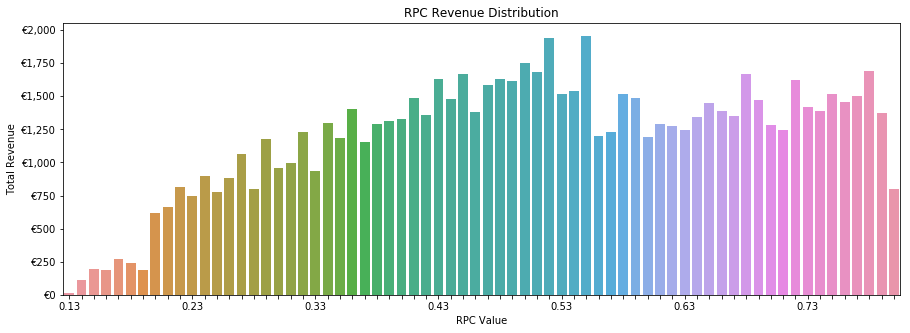

In [25]:
#plot total sum rpc per category value
plt.figure(figsize=(15,5))
ax = sns.barplot(x=revenue_dist['rpc'],y=revenue_dist['revenue_sum'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='RPC Value',ylabel='Total Revenue', title='RPC Revenue Distribution')
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

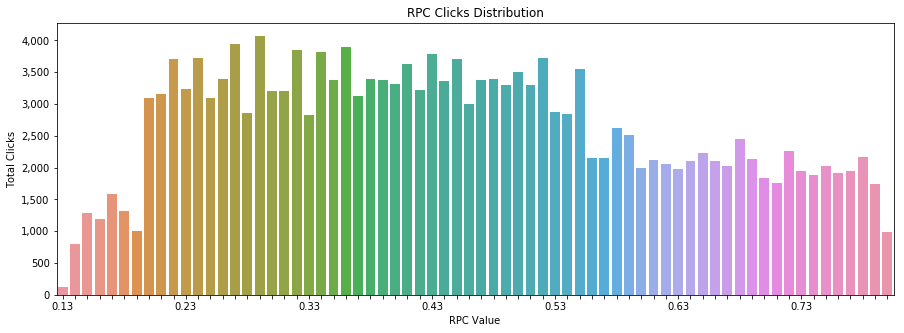

In [26]:
#plot total number of clicks per rpc category
plt.figure(figsize=(15,5))
ax = sns.barplot(x=revenue_dist['rpc'],y=revenue_dist['click_id'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='RPC Value',ylabel='Total Clicks', title='RPC Clicks Distribution')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)


# Performance Analysis

## Top Customers

In [27]:
#get total jobs per customer
jobs_count = customer_data.groupby('customer_id')['job_id'].nunique()
jobs_count = pd.DataFrame(jobs_count).reset_index()

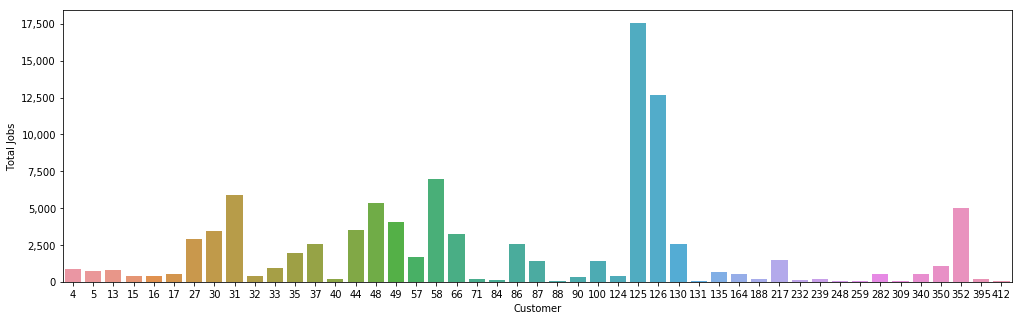

In [28]:
#plot total number of jobs per customer
plt.figure(figsize=(17,5))
ax = sns.barplot(x=jobs_count[jobs_count['job_id']>50]['customer_id'],y=jobs_count[jobs_count['job_id']>50]['job_id'])
ax.set(xlabel='Customer',ylabel='Total Jobs')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

In [29]:
jobs_revenue = revenue_data[['customer_id','rpc']].groupby('customer_id').sum()

In [30]:
jobs_revenue.head()

,rpc
customer_id,
2,18.75
4,985.87
5,988.21
13,1012.71
15,417.08


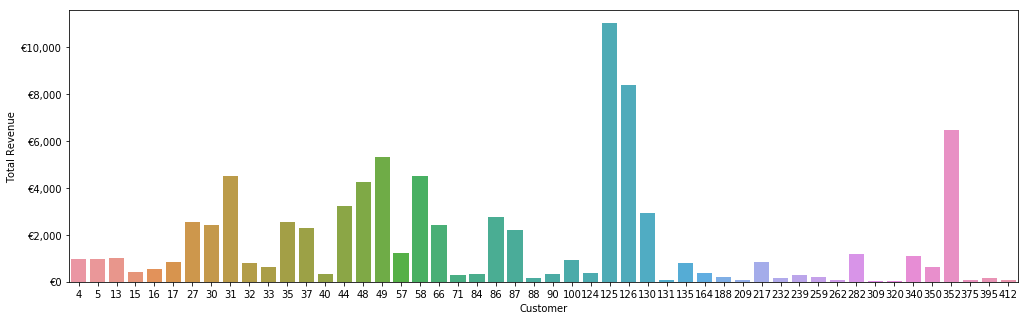

In [31]:
#plot total revenue of jobs per customer
plt.figure(figsize=(17,5))
ax = sns.barplot(x=jobs_revenue[jobs_revenue['rpc']>50].index,y=jobs_revenue[jobs_revenue['rpc']>50]['rpc'])
ax.set(xlabel='Customer',ylabel='Total Revenue', title='')
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

## Channels Performance

In [32]:
#get channel performance stats
channel_group = all_data.groupby('channel')
channel_ROI = pd.concat([channel_group['user_id'].nunique(),channel_group['click_id'].nunique()],axis=1).reset_index()
channel_ROI['ROI'] = channel_ROI['click_id']/channel_ROI['user_id']
channel_ROI.rename(columns={'user_id': 'unique_users', 'click_id':'unique_clicks'}, inplace=True)

In [33]:
channel_ROI

,channel,unique_users,unique_clicks,ROI
0,Display,237,443,1.869198
1,Email,6342,14164,2.233365
2,Referral,74833,115514,1.543624
3,Search,24780,50452,2.035997


Text(-0.1,-0.06,'Users \nShare')

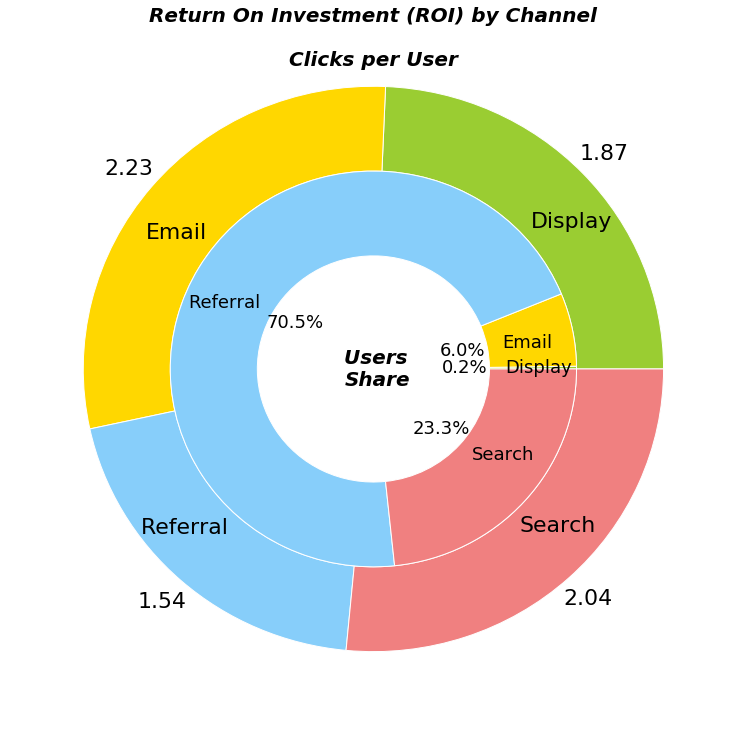

In [34]:
#plot nested pie chart with clicks per user by channel
fig, ax = plt.subplots(figsize=(13,13))
labels1 = list(channel_ROI['channel'])
labels2 = list(channel_ROI['channel'])
size = 0.3
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

ax.pie(channel_ROI['ROI'], radius=1,textprops={'fontsize': 22}, 
       shadow=False, labels=labels1, labeldistance=0.75, colors=colors, wedgeprops=dict(width=size, edgecolor='w'),
       autopct=lambda x: '{:.2f}'.format(x * channel_ROI['ROI'].sum() / 100), pctdistance=1.1)
ax.pie(channel_ROI['unique_users'], radius=1-size, textprops={'fontsize': 18}, labels=labels2, 
       shadow=False, rotatelabels=0, labeldistance=0.65, colors=colors, wedgeprops=dict(width=size, edgecolor='w'), 
       autopct='%.1f%%', pctdistance=0.45)
ax.set_title('''Return On Investment (ROI) by Channel

Clicks per User''', fontsize=20, fontstyle='oblique', fontweight='bold', position=(0.5,0.92))
ax.annotate('''Users 
Share''', fontsize=20, fontstyle='oblique', fontweight='bold', xy=(-0.1,-0.06))

# Conclusion

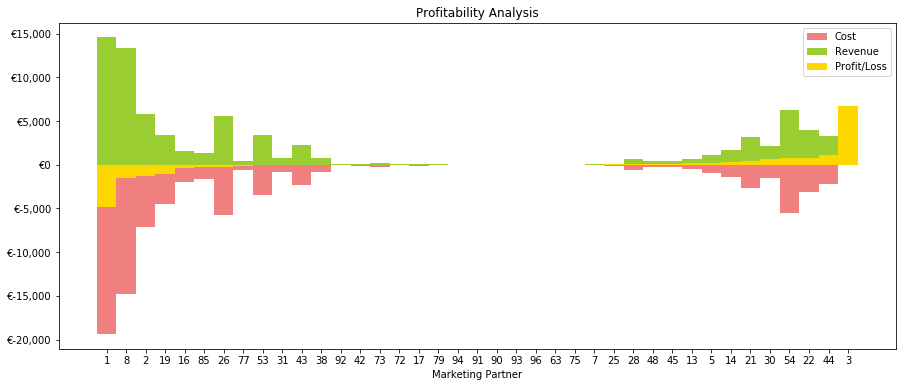

In [45]:
#display visually cost/revenue/profit measures per Marketing Partner
fig = plt.figure(figsize=(15,6))
ax = plt.subplot(111)
ax.bar(profit_analysis.sort_values('profit')['marketing_partner_id'].astype(str), profit_analysis.sort_values('profit')['cpc']*-1, width=1, color='lightcoral', label='Cost')
ax.bar(profit_analysis.sort_values('profit')['marketing_partner_id'].astype(str), profit_analysis.sort_values('profit')['rpc'], width=1, color='yellowgreen', label='Revenue')
ax.bar(profit_analysis.sort_values('profit')['marketing_partner_id'].astype(str), profit_analysis.sort_values('profit')['profit'], width=1, color='gold', label='Profit/Loss')
ax.legend()
ax.set_title('Profitability Analysis')
ax.set_xlabel('Marketing Partner')

#format yaxis ticks with € and 0 decimals
tick = mtick.StrMethodFormatter('€{x:,.0f}')
ax.yaxis.set_major_formatter(tick)

We have a lot of marketing partners flow that is not profitable, even though they generate most of the traffic. The most profitable source is actually the unpaid source, Email, but it's not the one who generates most revenue.

In [36]:
#overall sum profit
print(f"€{profit_analysis['profit'].sum():,.0f}")

€1,518


For this reason, we are barely profitable, most probably very negative since this analysis only accounts for direct costs.

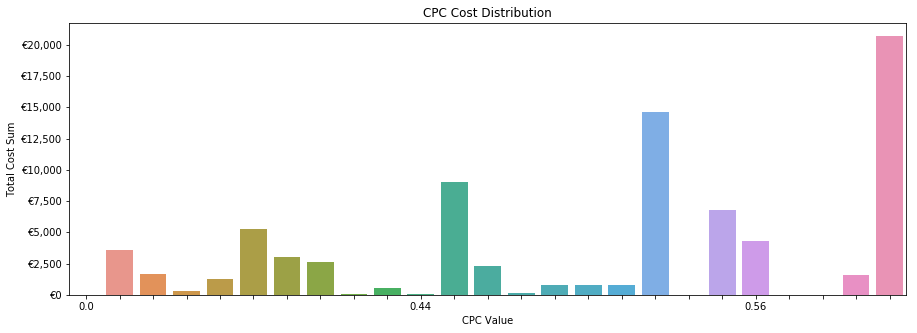

In [37]:
#plot total cost per cpc category value
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cost_dist['cpc'],y=cost_dist['cost_sum'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='CPC Value',ylabel='Total Cost Sum', title='CPC Cost Distribution')
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

If we look at the Cost distribution, we see that CPC values that are driving the costs up are the most expensive...

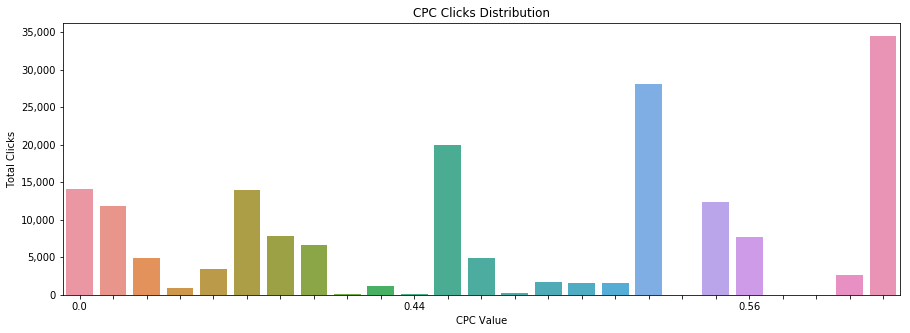

In [38]:
#plot total number of clicks per cpc category value
plt.figure(figsize=(15,5))
ax = sns.barplot(x=cost_dist['cpc'],y=cost_dist['click_id'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='CPC Value',ylabel='Total Clicks', title='CPC Clicks Distribution')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

Even though we have a more balanced Clicks distribution over the CPC values, but definitely still the number of clicks is higher on the higher CPC values.

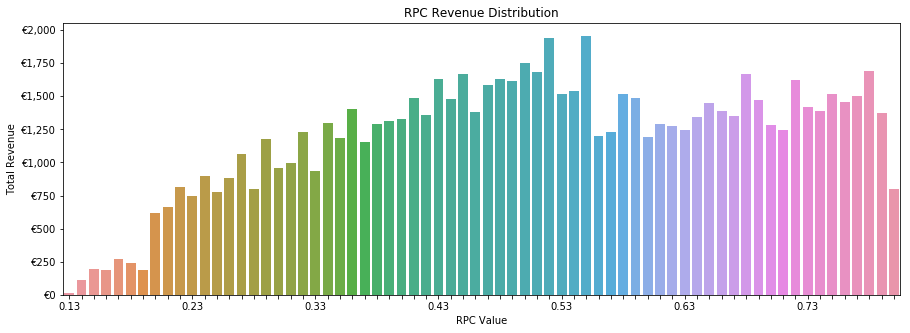

In [39]:
#plot total sum rpc per category value
plt.figure(figsize=(15,5))
ax = sns.barplot(x=revenue_dist['rpc'],y=revenue_dist['revenue_sum'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='RPC Value',ylabel='Total Revenue', title='RPC Revenue Distribution')
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

If we look at the revenue, the middle RPC values are the ones driving the most value...

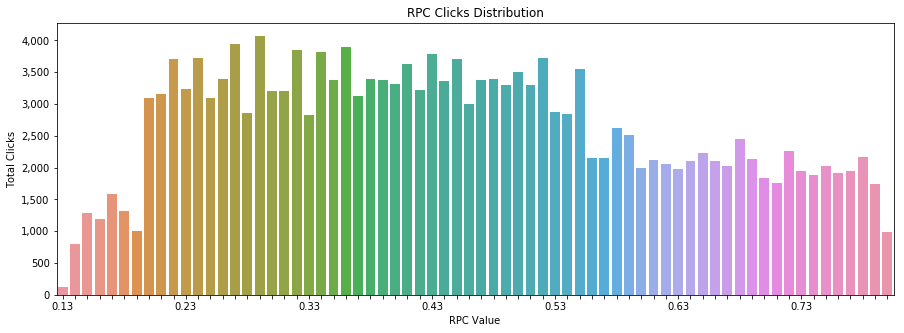

In [40]:
#plot total number of clicks per rpc category
plt.figure(figsize=(15,5))
ax = sns.barplot(x=revenue_dist['rpc'],y=revenue_dist['click_id'])
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
ax.set(xlabel='RPC Value',ylabel='Total Clicks', title='RPC Clicks Distribution')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

Even though the lower RPC values drive the most clicks.

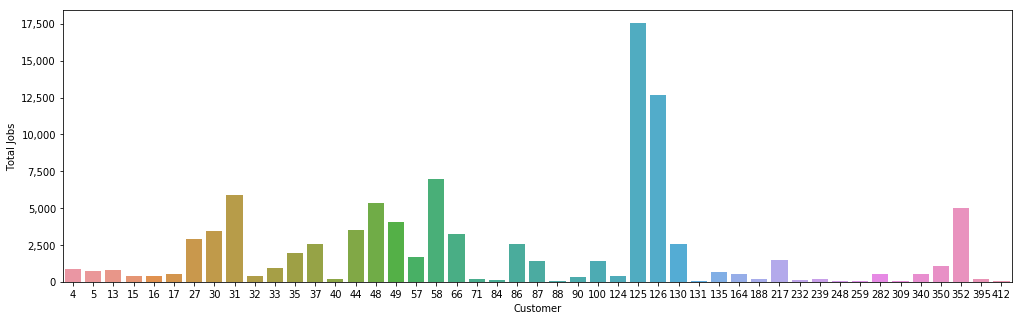

In [41]:
#plot total number of jobs per customer
plt.figure(figsize=(17,5))
ax = sns.barplot(x=jobs_count[jobs_count['job_id']>50]['customer_id'],y=jobs_count[jobs_count['job_id']>50]['job_id'])
ax.set(xlabel='Customer',ylabel='Total Jobs')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

Most of the jobs come from 10% of the total customers.

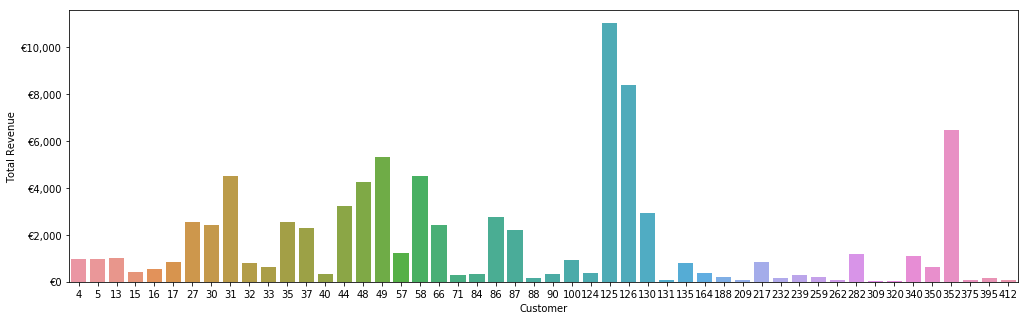

In [42]:
#plot total revenue of jobs per customer
plt.figure(figsize=(17,5))
ax = sns.barplot(x=jobs_revenue[jobs_revenue['rpc']>50].index,y=jobs_revenue[jobs_revenue['rpc']>50]['rpc'])
ax.set(xlabel='Customer',ylabel='Total Revenue')
fmt = '€{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

But not all of them generate as good profit as customer 49 and 352.

Text(-0.1,-0.06,'Users \nShare')

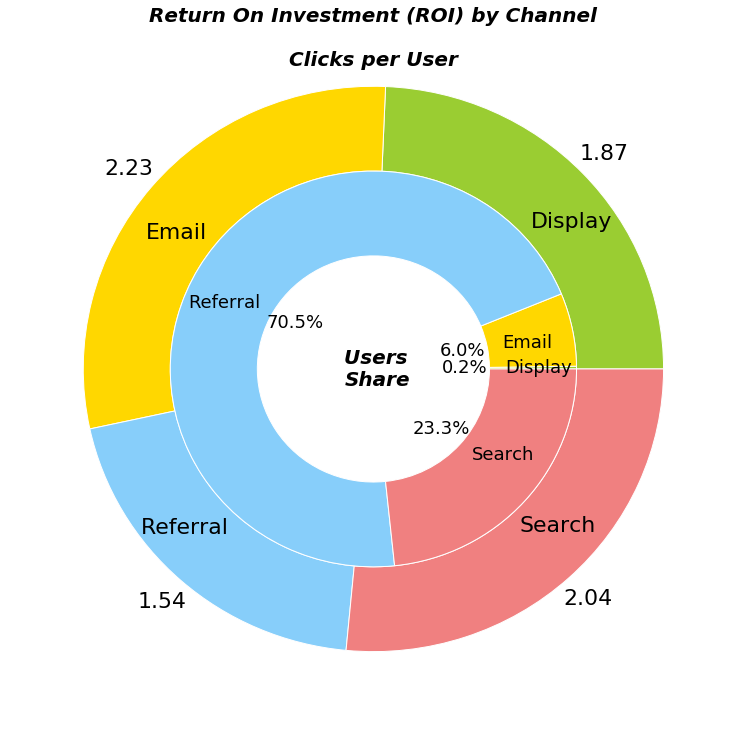

In [43]:
#plot nested pie chart with clicks per user by channel
fig, ax = plt.subplots(figsize=(13,13))
labels1 = list(channel_ROI['channel'])
labels2 = list(channel_ROI['channel'])
size = 0.3
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

ax.pie(channel_ROI['ROI'], radius=1,textprops={'fontsize': 22}, 
       shadow=False, labels=labels1, labeldistance=0.75, colors=colors, wedgeprops=dict(width=size, edgecolor='w'),
       autopct=lambda x: '{:.2f}'.format(x * channel_ROI['ROI'].sum() / 100), pctdistance=1.1)
ax.pie(channel_ROI['unique_users'], radius=1-size, textprops={'fontsize': 18}, labels=labels2, 
       shadow=False, rotatelabels=0, labeldistance=0.65, colors=colors, wedgeprops=dict(width=size, edgecolor='w'), 
       autopct='%.1f%%', pctdistance=0.45)
ax.set_title('''Return On Investment (ROI) by Channel

Clicks per User''', fontsize=20, fontstyle='oblique', fontweight='bold', position=(0.5,0.92))
ax.annotate('''Users 
Share''', fontsize=20, fontstyle='oblique', fontweight='bold', xy=(-0.1,-0.06))

Even though Email has the best Clicks per User rate and Referral the worse, reality is that most of the users are coming from Referral. This means that we are paying for customers that bring us less return on investment than all other channels.

My suggestion would be that Marketing should diversify the channels, especially try to attract more users from Email since they are the ones who not only do not have a cost but also have the best Click per User rate, being the ones who bring us the most potential revenue. Also Marketing should renegotiate the CPC with the marketing partners that are driving the profit down or try to expand the partneships with the ones that drive profit. 

Customer Managers should also attempt to attract more customers with plenty of jobs or at least try to make the existing ones more profitable by providing added value partnerships with selected customers who have a lot of volume and perhaps raise their RPC.